In [1]:
import os, sys 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymatgen.analysis.phase_diagram import PDPlotter, PhaseDiagram, PDEntry, Composition, Element
from thermopot import materials, calculations, reactions, potentials

In [2]:
data_path = "./BaZrS3/"

In [3]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")

BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")

ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/scan/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/scan/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [4]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},"../BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},"../BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},"../BaZrS3/phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},"../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},"../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},"../BaZrS3/phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

S8 = materials.IdealGas("S8",{'S':8},"../BaZrS3/nist_janaf/S8.dat",calculation=S8_calculation,zpe_lit=0.39)
S2 = materials.IdealGas("S2",{'S':2},"../BaZrS3/nist_janaf/S2.dat",calculation=S2_calculation,zpe_lit=0.047)

Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",calculation=S_calc)

S_g = materials.Sulfur_model(S8_calculation.energy/8) 

In [5]:
T=0
P=1
Ba_TP = PDEntry(Composition("Ba"), Ba.mu(T,P,xc='scan'))
S_TP  = PDEntry(Composition("S"), S.mu(T,P,xc='scan'))
BaS_TP = PDEntry(Composition("BaS"), BaS.mu(T,P,xc='scan'))
BaS2_TP = PDEntry(Composition("BaS2"), BaS2.mu(T,P,xc='scan'))
BaS3_P4_TP = PDEntry(Composition("BaS3"), BaS3_P4.mu(T,P,xc='scan'))
BaS3_P2_TP = PDEntry(Composition("BaS3"), BaS3_P2.mu(T,P,xc='scan'))
Ba2S3_TP = PDEntry(Composition("Ba2S3"), Ba2S3.mu(T,P,xc='scan'))

In [6]:
print(Ba.mu(T,P,xc='scan'))
print(S.mu(T,P,xc='scan'))
print(BaS.mu(T,P,xc='scan'))
print(BaS2.mu(T,P,xc='scan'))
print(BaS3_P4.mu(T,P,xc='scan'))
print(BaS3_P2.mu(T,P,xc='scan'))
print(Ba2S3.mu(T,P,xc='scan'))

-225172.20903735835
-10884.10576815325
-236061.2866191016
-246945.54193773813
-257829.76422643647
-257829.57823097456
-483006.5812450703


/Users/prakriti/pymatgen/pymatgen/analysis/phase_diagram.py:2281: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.get_figure().show()


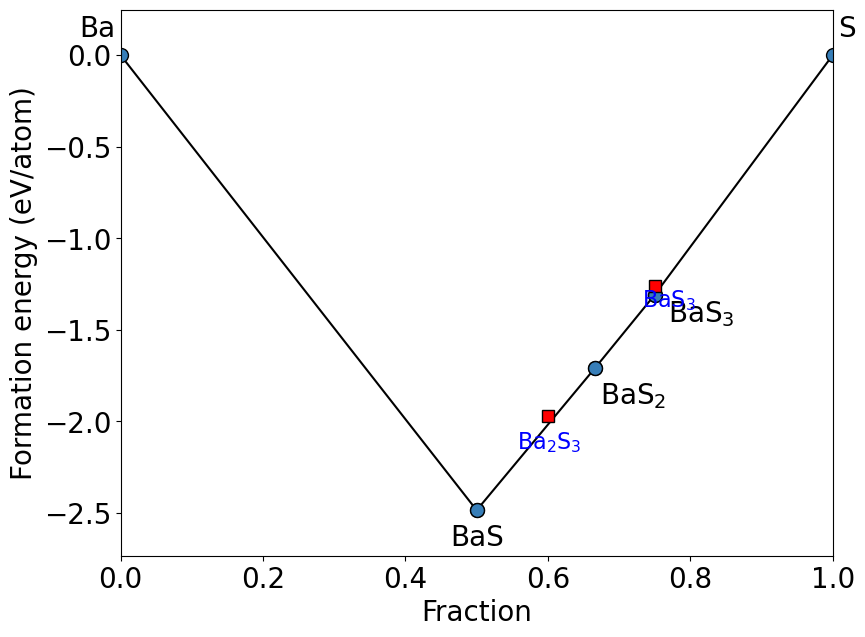

In [7]:
pd = PhaseDiagram([BaS_TP,BaS3_P4_TP,BaS2_TP,Ba2S3_TP,BaS3_P2_TP,Ba_TP,S_TP])
plotter = PDPlotter(pd, show_unstable=1, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216),markersize=10)
plotter.show()

In [8]:
T=1273
P=1
Ba_TP = PDEntry(Composition("Ba"), Ba.mu(T,P,xc='scan'))
S_TP  = PDEntry(Composition("S"), S.mu(T,P,xc='scan'))
BaS_TP = PDEntry(Composition("BaS"), BaS.mu(T,P,xc='scan'))
BaS2_TP = PDEntry(Composition("BaS2"), BaS2.mu(T,P,xc='scan'))
BaS3_P4_TP = PDEntry(Composition("BaS3"), BaS3_P4.mu(T,P,xc='scan'))
BaS3_P2_TP = PDEntry(Composition("BaS3"), BaS3_P2.mu(T,P,xc='scan'))
Ba2S3_TP = PDEntry(Composition("Ba2S3"), Ba2S3.mu(T,P,xc='scan'))


In [9]:
print(Ba.mu(T,P,xc='scan'))
print(S.mu(T,P,xc='scan'))
print(BaS.mu(T,P,xc='scan'))
print(BaS2.mu(T,P,xc='scan'))
print(BaS3_P4.mu(T,P,xc='scan'))
print(BaS3_P2.mu(T,P,xc='scan'))
print(Ba2S3.mu(T,P,xc='scan'))

-225173.16810436887
-10884.726639329594
-236062.66116162663
-246947.50592756714
-257832.2104651242
-257832.1346448211
-483009.97579827503


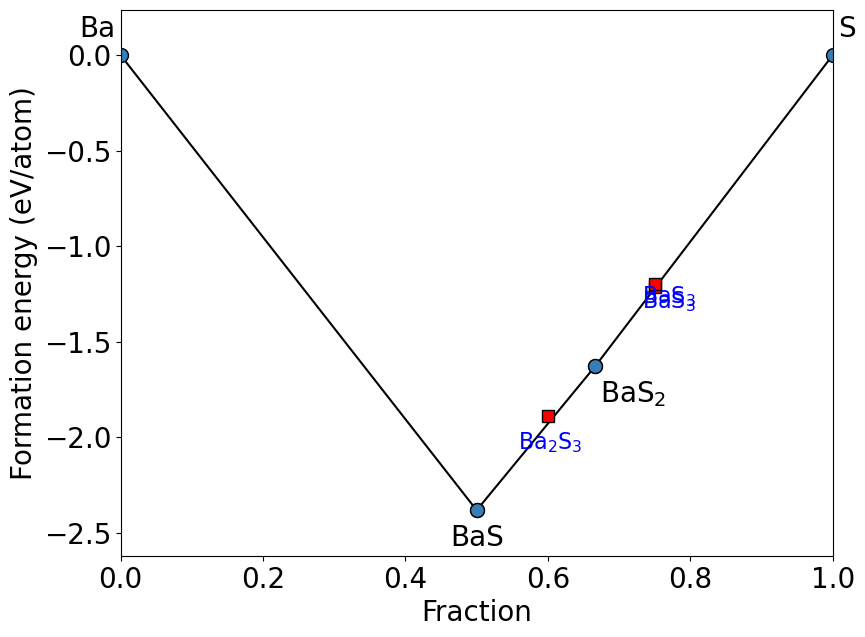

In [10]:
pd = PhaseDiagram([BaS_TP,BaS3_P4_TP,BaS2_TP,Ba2S3_TP,BaS3_P2_TP,Ba_TP,S_TP])
plotter = PDPlotter(pd, show_unstable=1, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216),markersize=10)
plotter.show()

In [11]:
T=0
P=1
Zr_TP = PDEntry(Composition("Zr"), Zr.mu(T,P,xc='scan'))
ZrS2_TP  = PDEntry(Composition("ZrS2"), ZrS2.mu(T,P,xc='scan'))
Zr3S4_TP = PDEntry(Composition("Zr3S4"), Zr3S4.mu(T,P,xc='scan'))
ZrS3_TP = PDEntry(Composition("ZrS3"), ZrS3_P2.mu(T,P,xc='scan'))
ZrS_Fm_TP = PDEntry(Composition("ZrS"), ZrS_Fm.mu(T,P,xc='scan'))
ZrS_P4_TP = PDEntry(Composition("ZrS"), ZrS_P4.mu(T,P,xc='scan'))

In [12]:
print(Zr.mu(T,P,xc='scan'))
print(ZrS2.mu(T,P,xc='scan'))
print(Zr3S4.mu(T,P,xc='scan'))
print(ZrS3_P2.mu(T,P,xc='scan'))
print(ZrS_Fm.mu(T,P,xc='scan'))
print(ZrS_P4.mu(T,P,xc='scan'))

-98799.79505493646
-120573.4149840848
-339943.3211441785
-131457.8120425917
-109687.04915444272
-109687.26050838096


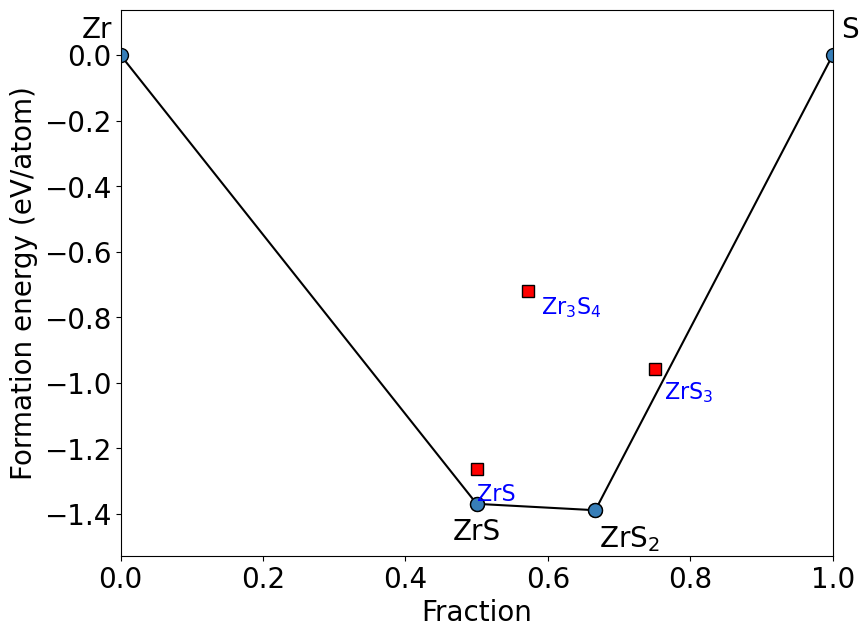

In [13]:
pd = PhaseDiagram([ZrS2_TP,Zr3S4_TP,ZrS3_TP,ZrS_Fm_TP,ZrS_P4_TP,Zr_TP,S_TP])
plotter = PDPlotter(pd, show_unstable=1, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216),markersize=10)
plotter.show()

In [14]:
T=1273
P=1
Zr_TP = PDEntry(Composition("Zr"), Zr.mu(T,P,xc='scan'))
ZrS2_TP  = PDEntry(Composition("ZrS2"), ZrS2.mu(T,P,xc='scan'))
Zr3S4_TP = PDEntry(Composition("Zr3S4"), Zr3S4.mu(T,P,xc='scan'))
ZrS3_TP = PDEntry(Composition("ZrS3"), ZrS3_P2.mu(T,P,xc='scan'))
ZrS_Fm_TP = PDEntry(Composition("ZrS"), ZrS_Fm.mu(T,P,xc='scan'))
ZrS_P4_TP = PDEntry(Composition("ZrS"), ZrS_P4.mu(T,P,xc='scan'))

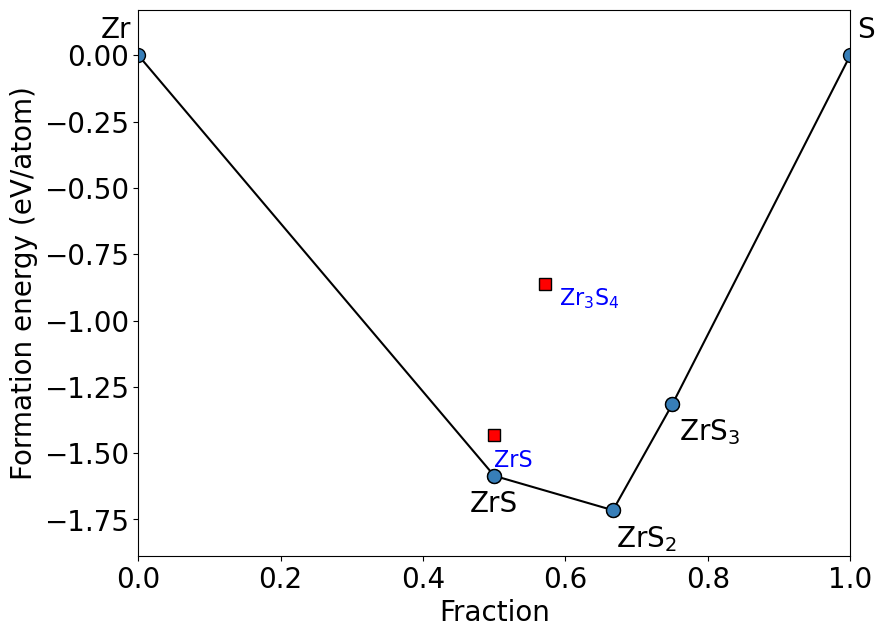

In [16]:
pd = PhaseDiagram([ZrS2_TP,Zr3S4_TP,ZrS3_TP,ZrS_Fm_TP,ZrS_P4_TP,Zr_TP,S_TP])
plotter = PDPlotter(pd, show_unstable=1, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216),markersize=10)
plotter.show()